# Cropping an Image using OpenCV

In [22]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

In [2]:
img=cv2.imread('images/1.JPG')
 
# Prints Dimensions of the image
print(img.shape) 
 
# Display the image
cv2.imshow("original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(503, 894, 3)


cropped = img[start_row:end_row, start_col:end_col]

In [3]:
# Slicing to crop the image
cropped_image = img[80:280, 150:330] 
 
# Display the cropped image
cv2.imshow("cropped", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows() 

## Chia hình ảnh thành các phần nhỏ bằng cách cắt xén

In [7]:
img = cv2.imread('images/1.JPG')
image_copy = img.copy()
imgheight = img.shape[0]
imgwidth = img.shape[1] 
print('height',imgheight,'width',imgwidth)

height 503 width 894


sử dụng các bản vá có chiều cao và chiều rộng lần lượt là 76 pixel và 104 pixel. Bước (số pixel chúng ta di chuyển qua hình ảnh) cho các vòng lặp bên trong và bên ngoài bằng với chiều rộng và chiều cao của các mảng mà chúng ta đang xem xét.

In [8]:
M = 76
N = 104
x1 = 0
y1 = 0

for y in range(0,imgheight,M):
    for x in range(0,imgwidth,N):
        if (imgheight - y) < M or (imgwidth -x) < N:
            break
        x1 = x + N
        y1 = y + M
        
        #kiểm tra xem chiều rộng hoặc chiều cao của bản vá 
        #có vượt quá chiều rộng hoặc chiều cao của hình ảnh không
        if x1 >= imgwidth and y1 >= imgheight:
            x1 = imgwidth - 1
            y1 = imgheight - 1
            #Cắt thành các bản vá có kích thước MXN
            tiles = image_copy[y:y+M, x:x+N]
            #Lưu từng bản vá vào thư mục tệp
            cv2.imwrite('images/' + 'tile'+str(x)+'_'+str(y)+'.jpg',tiles)
            cv2.rectangle(img, (x,y), (x1,y1), (0,255,0),1)
        elif y1 >= imgheight: # when patch height exceeds the image height
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('images/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif x1 >= imgwidth: # when patch width exceeds the image width
            x1 = imgwidth - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('images/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        else:
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('images/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)


In [9]:
#Save full image into file directory
cv2.imshow("Patched Image",img)
cv2.imwrite("images/patched.jpg",img)
  
cv2.waitKey()
cv2.destroyAllWindows()

# Xoay và dịch hình ảnh bằng OpenCV

getRotationMatrix2D(center, angle, scale)
- center: tâm xoay của ảnh đầu vào
- angle: góc quay tính bằng độ
- scale: hệ số tỷ lệ đẳng hướng giúp tăng tỷ lệ hình ảnh lên hoặc xuống theo giá trị được cung cấp

Nếu angle dương, hình ảnh sẽ được xoay theo hướng ngược chiều kim đồng hồ. Nếu bạn muốn xoay hình ảnh theo chiều kim đồng hồ với cùng một lượng, thì angle cần phải âm.

Xoay là một hoạt động ba bước:

1. Đầu tiên, bạn cần lấy tâm quay. Đây thường là trung tâm của hình ảnh mà bạn đang cố xoay.
2. Tiếp theo, tạo ma trận xoay 2D. OpenCV cung cấp getRotationMatrix2D() chức năng mà chúng ta đã thảo luận ở trên. 
3. Cuối cùng, áp dụng phép biến đổi affine cho hình ảnh, sử dụng ma trận xoay mà bạn đã tạo ở bước trước. Chức warpAffine() năng trong OpenCV thực hiện công việc.

Hàm warpAffine()áp dụng phép biến đổi affine cho ảnh. Sau khi áp dụng phép biến đổi affine, tất cả các đường song song trong ảnh gốc cũng sẽ vẫn song song trong ảnh đầu ra.

warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])

- src: pháp sư nguồn
- M: ma trận biến đổi
- dsize: kích thước của hình ảnh đầu ra
- dst: hình ảnh đầu ra
- flags: kết hợp các phương thức nội suy như INTER_LINEAR hoặc INTER_NEAREST
- borderMode: phương pháp ngoại suy pixel
- borderValue: giá trị được sử dụng trong trường hợp đường viền không đổi, có giá trị mặc định là 0

In [13]:
image = cv2.imread('images/1.JPG')

#Tim diem trung tam
height, width = image.shape[:2]
center = (width/2,height/2)
center

(447.0, 251.5)

In [14]:
rotate_matrix = cv2.getRotationMatrix2D(center=center,angle=45,scale=1)

In [16]:
rotated_image = cv2.warpAffine(src=image,M=rotate_matrix,dsize=(width,height))

In [17]:
# visualize the original and the rotated image
cv2.imshow('Original image', image)
cv2.imshow('Rotated image', rotated_image)
# wait indefinitely, press any key on keyboard to exit
cv2.waitKey(0)
cv2.destroyAllWindows()
# write the output, the rotated image to disk
#cv2.imwrite('rotated_image.jpg', rotated_image)

True

## Dịch hình ảnh bằng OpenCV

In [18]:
#get tx and ty values for translation
# you can specify any value of your choice
tx, ty = width / 4, height / 4
 
# create the translation matrix using tx and ty, it is a NumPy array 
translation_matrix = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

In [19]:
#apply the translation to the image
translated_image = cv2.warpAffine(src=image, M=translation_matrix, dsize=(width, height))

In [20]:
# display the original and the Translated images
cv2.imshow('Translated image', translated_image)
cv2.imshow('Original image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
# save the translated image to disk
#cv2.imwrite('translated_image.jpg', translated_image)

-1

In [21]:
import requests
url = "https://cdn.pixabay.com/photo/2020/12/27/12/07/sunrise-5863751_1280.png"
r = requests.get(url)
with open('image.png', 'wb') as f:
    f.write(r.content) 

In [23]:
# first step, reading the image
image = cv2.imread('image.png')

# we need the image center for rotating it correctly
# we can get that using width/2, height/2
height, width = image.shape[:2]
center = (width/2, height/2)

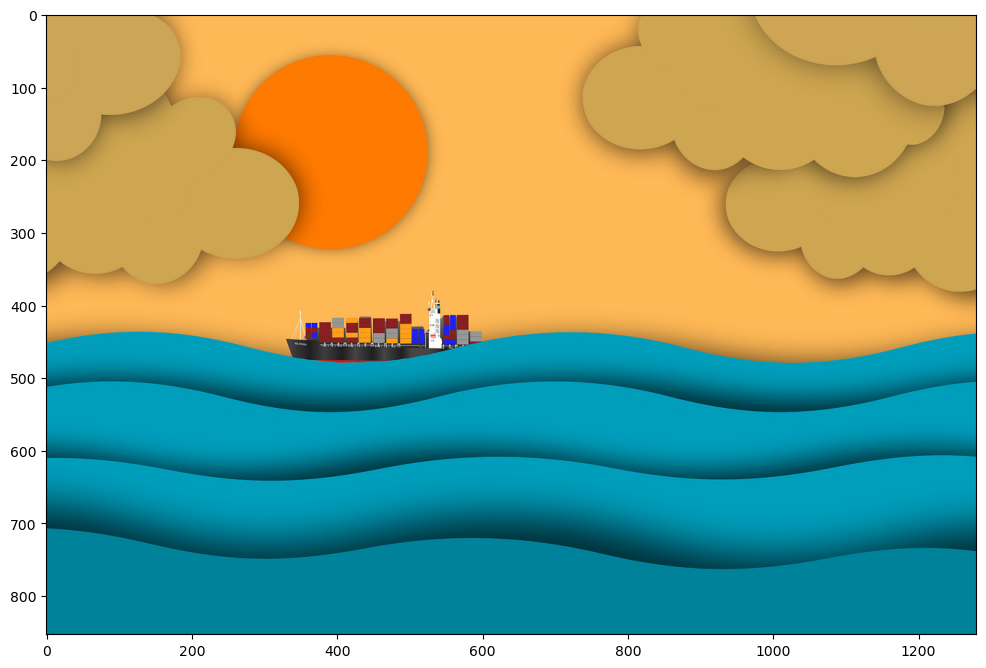

In [24]:
plt.imshow(image[:, :, ::-1])

In [26]:
rotated_image = cv2.warpAffine(src=image, M=rotate_matrix, dsize=(width, height))

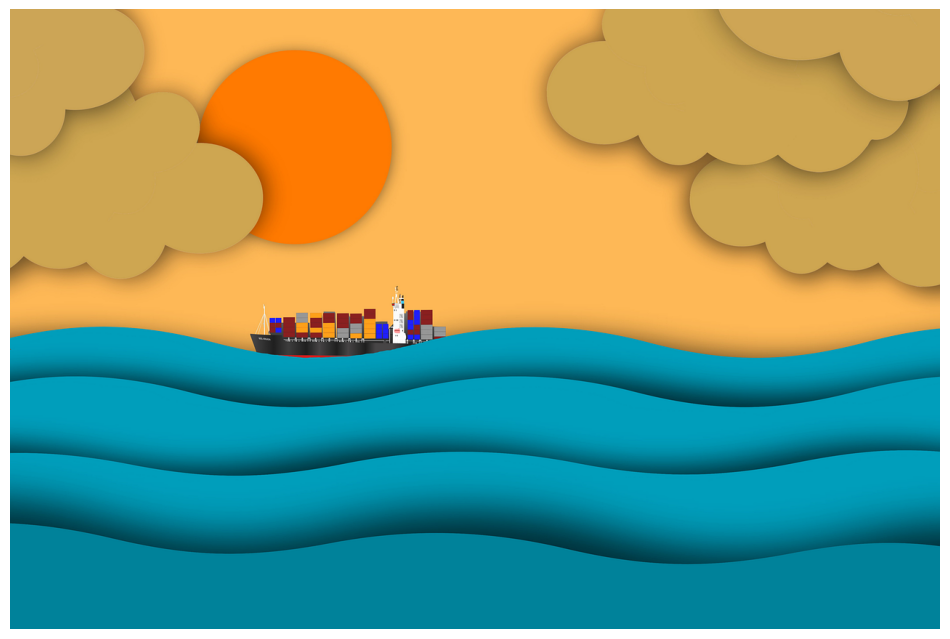

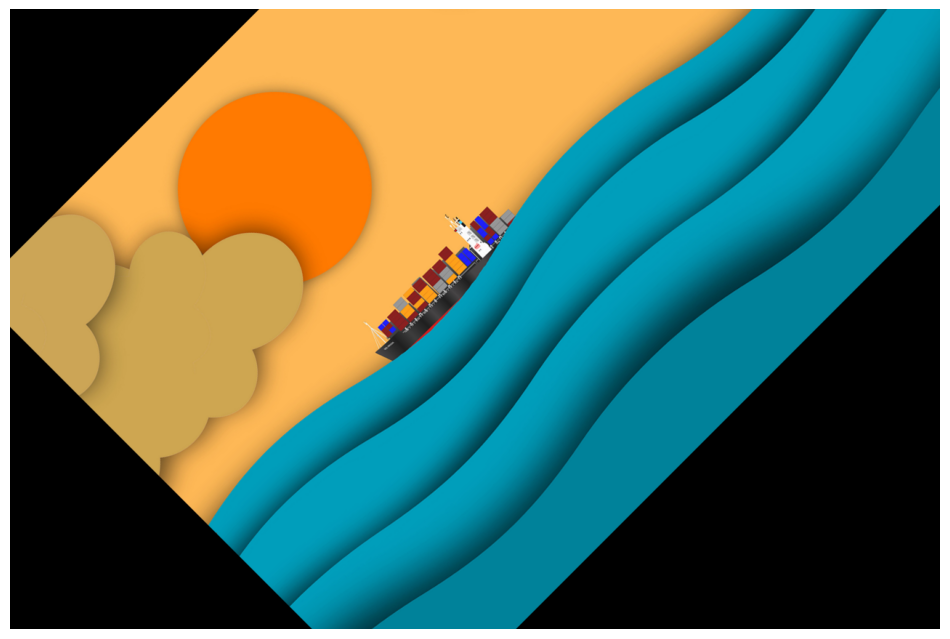

True

In [27]:
plt.imshow(image[:, :, ::-1])
plt.axis('off')
plt.show()
print('\n')
plt.imshow(rotated_image[:, :, ::-1])
plt.axis('off')
plt.show()
# we can also write the rotated image to disk
#cv2.imwrite('rotated_image.png', rotated_image)

In [28]:
translated_image = cv2.warpAffine(
    src=image, M=translation_matrix, dsize=(width, height)
)

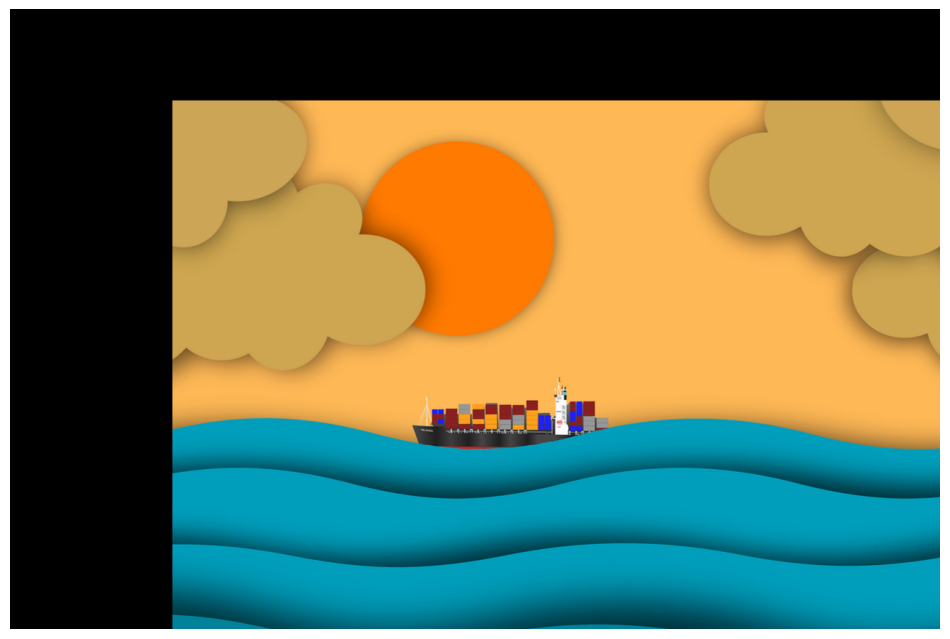

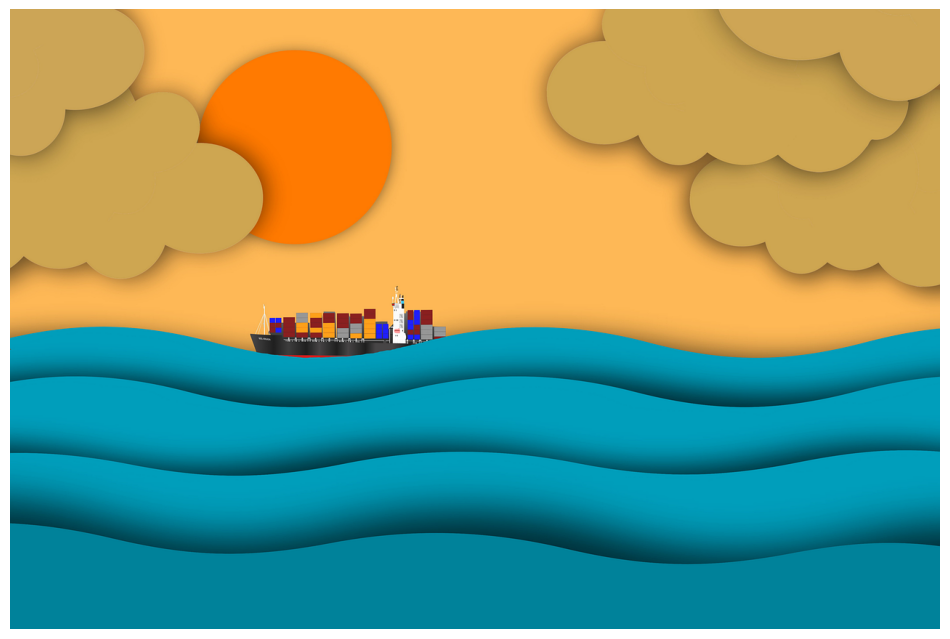

In [29]:
# show the images
plt.imshow(translated_image[:, :, ::-1])
plt.axis('off')
plt.show()
print('\n')
plt.imshow(image[:, :, ::-1])
plt.axis('off')
plt.show()
#cv2.imwrite('translated_image.png', translated_image)